In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit

In [6]:
income_df =pd.read_csv("State income.csv")
income_df

,Unnamed: 0,Population,Household Income,State
0,0,20612439.0,50860.0,Florida
1,1,10310371.0,53559.0,Georgia
2,2,1428557.0,74511.0,Hawaii
3,3,1683140.0,51807.0,Idaho
4,4,12801539.0,60960.0,Illinois
5,5,6633053.0,52314.0,Indiana
6,6,3134693.0,56247.0,Iowa
7,7,2907289.0,54935.0,Kansas
8,8,4436974.0,46659.0,Kentucky
9,9,4681666.0,45146.0,Louisiana


In [7]:
cancer_df = pd.read_csv("Resource/Added_final_combined_cancer_data.csv")
cancer_df

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
0,Kentucky,521.0,26945.0,198.0,10206.0,38.0
1,Delaware,498.0,5803.0,170.0,1989.0,34.0
2,Pennsylvania,487.0,79060.0,169.0,28658.0,36.0
3,New Hampshire,484.0,8129.0,162.0,2718.0,33.0
4,New Jersey,483.0,50921.0,154.0,16407.0,32.0
5,New York,483.0,111527.0,151.0,35491.0,32.0
6,Louisiana,481.0,24888.0,183.0,9346.0,38.0
7,Rhode Island,478.0,6163.0,165.0,2223.0,36.0
8,West Virginia,476.0,11653.0,189.0,4756.0,41.0
9,Maine,476.0,8700.0,174.0,3267.0,38.0


In [22]:
merged_table =pd.merge(income_df, cancer_df, how="left", on="State").dropna()
#merged_table = del(merged_table["Unnamed:0"])
merged_table.head()

,Unnamed: 0,Population,Household Income,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
0,0,20612439.0,50860.0,Florida,452.0,121916.0,153.0,43285.0,36.0
1,1,10310371.0,53559.0,Georgia,466.0,49003.0,166.0,16650.0,34.0
3,3,1683140.0,51807.0,Idaho,440.0,7924.0,155.0,2761.0,35.0
4,4,12801539.0,60960.0,Illinois,466.0,67683.0,168.0,24531.0,36.0
5,5,6633053.0,52314.0,Indiana,457.0,34242.0,178.0,13416.0,39.0


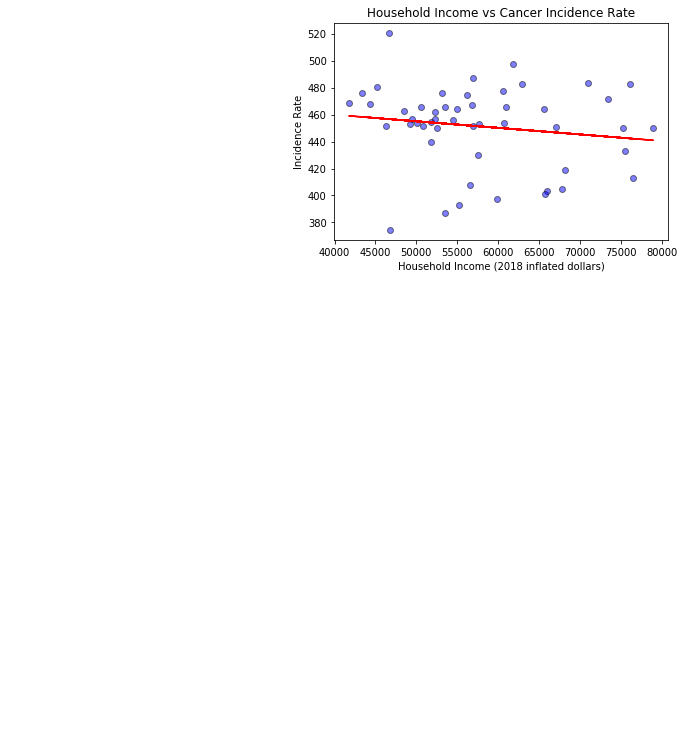

The r-squared is: -0.15339048230981595


In [37]:
income = merged_table["Household Income"]
incidence_rate = merged_table["Incidence Rate"]

plt.scatter(income,incidence_rate, edgecolors= "black", facecolors="blue", alpha=.5)
plt.xlabel("Household Income (2018 inflated dollars)")
plt.ylabel("Incidence Rate")
plt.title("Household Income vs Cancer Incidence Rate")

(slope, intercept, rvalue, pvalue, stderr) = linregress(income, incidence_rate)
tempregress_values = income*slope + intercept
templine_eq = "y = " + str(round(slope,2)) + "x = " + str(round(intercept, 2))

plt.annotate(templine_eq,(6,10), fontsize=15, color="red")
plt.plot(income, tempregress_values, "r-")
plt.show()

print(f"The r-squared is: {rvalue}")

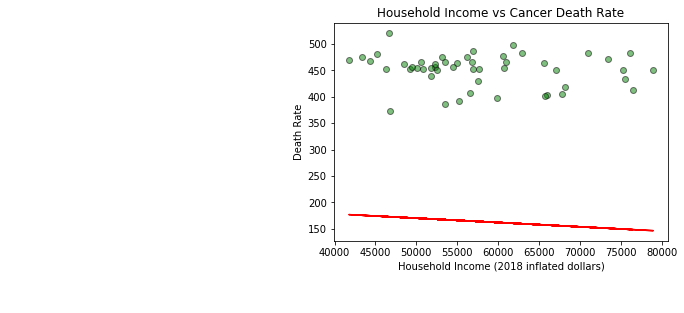

The r-squared is: -0.5426915623986303


In [39]:
income = merged_table["Household Income"]
cancer_death = merged_table["Death Rate"]

plt.scatter(income,incidence_rate, edgecolors= "black", facecolors="green", alpha=.5)
plt.xlabel("Household Income (2018 inflated dollars)")
plt.ylabel("Death Rate")
plt.title("Household Income vs Cancer Death Rate")

(slope, intercept, rvalue, pvalue, stderr) = linregress(income, cancer_death)
tempregress_values = income*slope + intercept
templine_eq = "y = " + str(round(slope,2)) + "x = " + str(round(intercept, 2))

plt.annotate(templine_eq,(6,10), fontsize=15, color="red")
plt.plot(income, tempregress_values, "r-")
plt.show()

print(f"The r-squared is: {rvalue}")

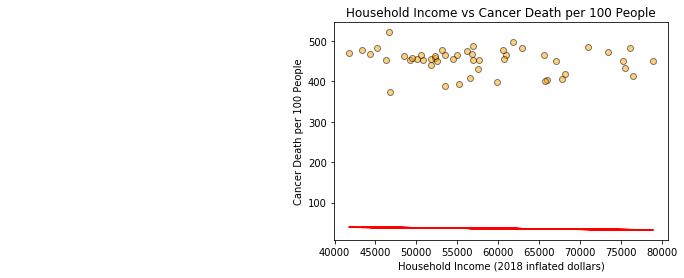

The r-squared is: -0.6620649247646108


In [38]:
income = merged_table["Household Income"]
Death_per_hundred = merged_table["Cancer Death_per_hundred_cancer_patient"]

plt.scatter(income,incidence_rate, edgecolors= "black", facecolors="orange", alpha=.5)
plt.xlabel("Household Income (2018 inflated dollars)")
plt.ylabel("Cancer Death per 100 People")
plt.title("Household Income vs Cancer Death per 100 People")

(slope, intercept, rvalue, pvalue, stderr) = linregress(income, Death_per_hundred)
tempregress_values = income*slope + intercept
templine_eq = "y = " + str(round(slope,2)) + "x = " + str(round(intercept, 2))

plt.annotate(templine_eq,(6,10), fontsize=15, color="red")
plt.plot(income, tempregress_values, "r-")
plt.show()
print(f"The r-squared is: {rvalue}")